# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 1
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# !pip uninstall scipy
# !pip install scipy==1.11.4

In [ ]:
import scipy
print(scipy.__version__)

1.11.4


In [ ]:
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
!pip install ucimlrepo

In [ ]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from numpy import interp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings('ignore')

In [ ]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [ ]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [ ]:
data['target'] = target
data.dropna(inplace=True)
print(data.shape)

(845, 19)


In [ ]:
data['COMPACTNESS'] = data['COMPACTNESS'].astype(np.int64)

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

In [ ]:
target = data['target']
df = data.drop(columns=['target'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676,) (169, 18) (169,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
468,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
788,115,52,100,203,62,10,217,31,24,165,229,697,214,72,14,4,188,197
538,101,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196
266,86,42,65,116,53,6,152,45,19,141,175,335,172,85,5,4,179,183
352,91,46,78,148,61,9,147,45,19,152,168,323,199,70,13,11,189,200
821,104,56,96,231,74,11,220,30,25,172,223,713,218,73,6,16,186,195
506,101,51,112,201,59,11,214,32,24,162,223,667,194,65,0,36,190,206
826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
678,86,45,70,122,56,7,148,45,19,144,170,324,186,84,9,5,180,183
79,89,44,68,113,50,7,150,45,19,147,171,328,189,88,6,5,179,182


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.683432,44.905325,82.072485,168.769231,61.656805,8.705621,168.650888,41.007396,20.568047,148.099112,188.328402,438.834320,174.755917,72.536982,6.313609,12.485207,188.866864,195.640533
std,8.202642,6.150693,15.874109,34.343709,8.343050,5.041225,33.225550,7.888948,2.580230,14.560238,31.394482,175.903338,32.353802,7.800672,4.839883,8.902339,6.209911,7.478923
min,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.750000,33.000000,19.000000,137.000000,167.000000,318.750000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.250000,65.000000,10.000000,198.250000,46.000000,23.000000,160.000000,217.000000,590.500000,198.000000,75.250000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 468 to 102
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   COMPACTNESS                       676 non-null    int64
 1   CIRCULARITY                       676 non-null    int64
 2   DISTANCE CIRCULARITY              676 non-null    int64
 3   RADIUS RATIO                      676 non-null    int64
 4   PR.AXIS ASPECT RATIO              676 non-null    int64
 5   MAX.LENGTH ASPECT RATIO           676 non-null    int64
 6   SCATTER RATIO                     676 non-null    int64
 7   ELONGATEDNESS                     676 non-null    int64
 8   PR.AXIS RECTANGULARITY            676 non-null    int64
 9   MAX.LENGTH RECTANGULARITY         676 non-null    int64
 10  SCALED VARIANCE ALONG MAJOR AXIS  676 non-null    int64
 11  SCALED VARIANCE ALONG MINOR AXIS  676 non-null    int64
 12  SCALED RADIUS OF GYRATION         676 n

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
logreg = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5, penalty='l2', solver='saga', tol=1e-3, max_iter=500)
logreg.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5,
                     max_iter=500, solver='saga', tol=0.001)

In [ ]:
best_Cs = logreg.C_[0]
print(f'Optimal value of Cs: {best_Cs:.0f}')

Optimal value of Cs: 100


In [ ]:
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f'f1 quality: {f1:.3f}')
print(f'accuracy quality: {accuracy:.3f}')

f1 quality: 0.784
accuracy quality: 0.787


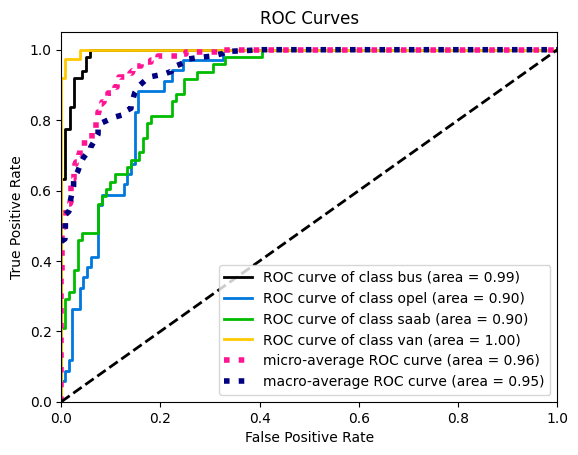

In [ ]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [ ]:
explaided_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explaided_var)

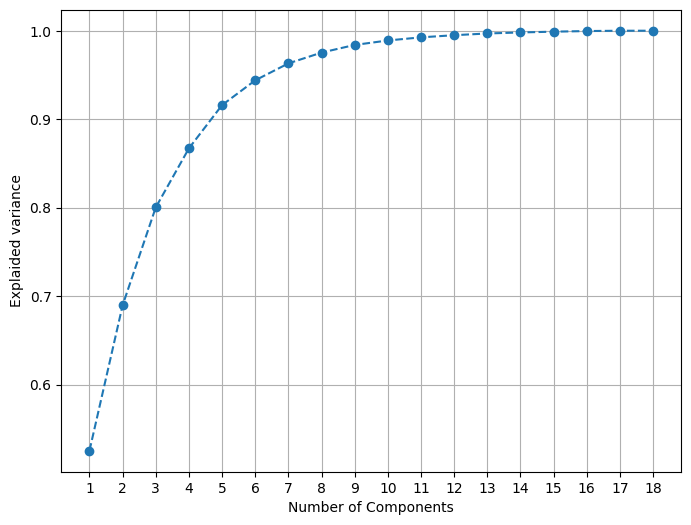

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 19), cum_var, 'o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explaided variance')
plt.grid(True)
plt.xticks(range(1, 19))
plt.show()

### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

In [ ]:
min_num_copmonents = np.min(np.argwhere(cum_var > 0.99))
min_num_copmonents

10

In [ ]:
pca = PCA(min_num_copmonents)
pca.fit(X_train_scaled)

PCA(n_components=10)

In [ ]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
print(X_train_pca.shape, X_test_pca.shape)

(676, 10) (169, 10)


Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99)),
    ('logreg', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5, penalty='l2', solver='saga', tol=1e-3, max_iter=500)),
])

In [ ]:
pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)
y_pred = pipe.predict(X_test)

In [ ]:
best_Cs = pipe.named_steps['logreg'].C_[0]
print(f'Optimal value of Cs: {best_Cs:.0f}')

Optimal value of Cs: 100


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f'f1 quality: {f1:.3f}')
print(f'accuracy quality: {accuracy:.3f}')

f1 quality: 0.723
accuracy quality: 0.728


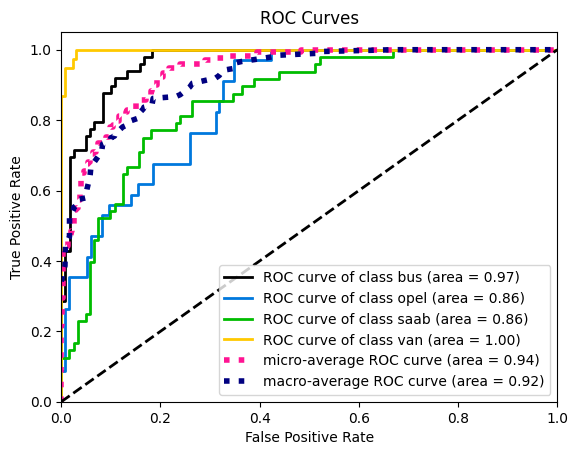

In [ ]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
clf = DecisionTreeClassifier()

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': np.linspace(1, 20, 20).astype(int)
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'clf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='f1_macro')

In [ ]:
print(f"Optimal loss function: {grid.best_params_['clf__criterion']}")
print(f"Optimal value of tree depth: {grid.best_params_['clf__max_depth']:.0f}")

Optimal loss function: log_loss
Optimal value of tree depth: 11


In [ ]:
y_pred_proba = grid.predict_proba(X_test)
y_pred = grid.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f'f1 quality: {f1:.3f}')
print(f'accuracy quality: {accuracy:.3f}')

f1 quality: 0.765
accuracy quality: 0.763


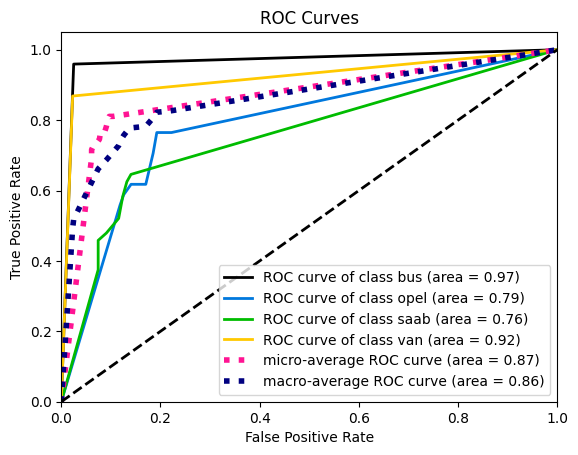

In [ ]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
N_estimators = np.arange(2, 100, 5)

In [ ]:
ensembles = {
    'logistic regression': LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

accuracy_list = {
    'logistic regression': [],
    'decision tree': []
}

f1_list = {
    'logistic regression': [],
    'decision tree': []
}

In [ ]:
for ens in ensembles.items():
  for n in N_estimators:
    bagging_log_reg = BaggingClassifier(
        estimator=ens[1],
        n_estimators=n,
        random_state=42
    )
    bagging_log_reg.fit(X_train_scaled, y_train)
    y_pred = bagging_log_reg.predict(X_test_scaled)

    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    f1_list[ens[0]].append(f1)
    accuracy_list[ens[0]].append(accuracy)

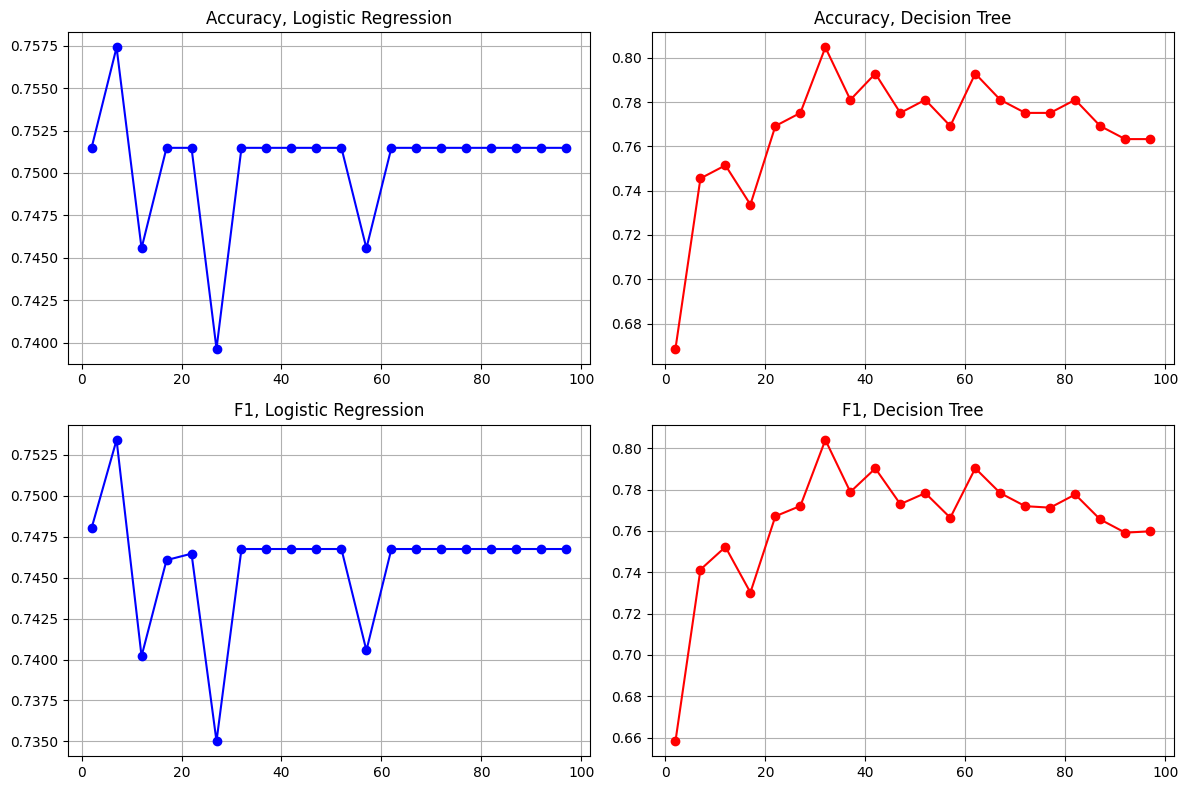

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].plot(N_estimators, accuracy_list['logistic regression'], marker='o', color='b')
axs[0,0].set_title('Accuracy, Logistic Regression')
axs[0,0].grid(True)

axs[0,1].plot(N_estimators, accuracy_list['decision tree'], marker='o', color='r')
axs[0,1].set_title('Accuracy, Decision Tree')
axs[0,1].grid(True)

axs[1,0].plot(N_estimators, f1_list['logistic regression'], marker='o', color='b')
axs[1,0].set_title('F1, Logistic Regression')
axs[1,0].grid(True)

axs[1,1].plot(N_estimators, f1_list['decision tree'], marker='o', color='r')
axs[1,1].set_title('F1, Decision Tree')
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

Выбираем такое количество деревьев, при которых наша выбранная метрика максимальна.

Гиперпараметры в случае бэггинга и в решающих деревьях никак не связаны.

### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
n_estimators = np.arange(2, 205, 5)

accuracy_list_rand_forest = []
f1_list_rand_forest = []

In [ ]:
for n in n_estimators:
  rand_forest = RandomForestClassifier(n_estimators=n, random_state=40)

  rand_forest.fit(X_train_scaled, y_train)
  y_pred = rand_forest.predict(X_test_scaled)

  f1 = f1_score(y_test, y_pred, average='weighted')
  accuracy = accuracy_score(y_test, y_pred)

  f1_list_rand_forest.append(f1)
  accuracy_list_rand_forest.append(accuracy)

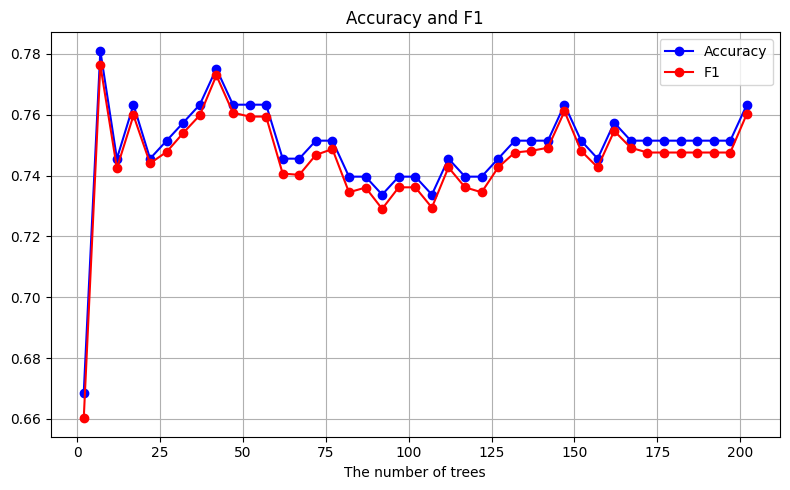

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(n_estimators, accuracy_list_rand_forest, marker='o', color='b', label='Accuracy')
plt.plot(n_estimators, f1_list_rand_forest, marker='o', color='r', label='F1')

plt.xlabel('The number of trees')
plt.legend()
plt.grid(True)
plt.title('Accuracy and F1')
plt.tight_layout()
plt.show()

Оптимальное количество деревьев - 42

Количество деревье в этом и предыдущем пункте не совпадает. \\

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
ensembles = {
    'Logistic regression': LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42, C=100),
    'Decision tree': DecisionTreeClassifier(max_depth=11, random_state=42),
    'Random forest': RandomForestClassifier(n_estimators=42, random_state=42)
}

accuracy_list = {
    'Logistic regression': [],
    'Decision tree': [],
    'Random forest': []
}

f1_list = {
    'Logistic regression': [],
    'Decision tree': [],
    'Random forest': []
}

In [ ]:
for ens_name, ens in ensembles.items():
  train_sizes, train_scores, test_scores = learning_curve(
      estimator=ens,
      X = X_train_scaled,
      y = y_train,
      train_sizes=np.linspace(0.1, 1.0, 10),
      cv=5,
      scoring='accuracy'
  )
  train_mean = np.mean(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  accuracy_list[ens_name] = test_mean


  train_sizes, train_scores, test_scores = learning_curve(
      estimator=ens,
      X = X_train_scaled,
      y = y_train,
      train_sizes=np.linspace(0.1, 1.0, 10),
      cv=5,
      scoring='f1_macro'
  )
  train_mean = np.mean(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  f1_list[ens_name] = test_mean

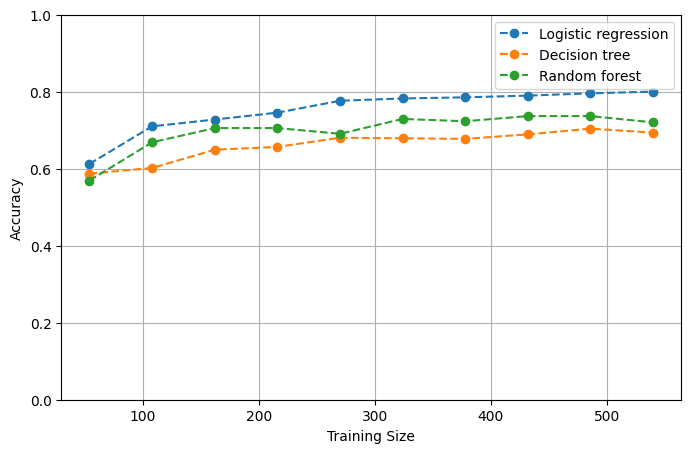

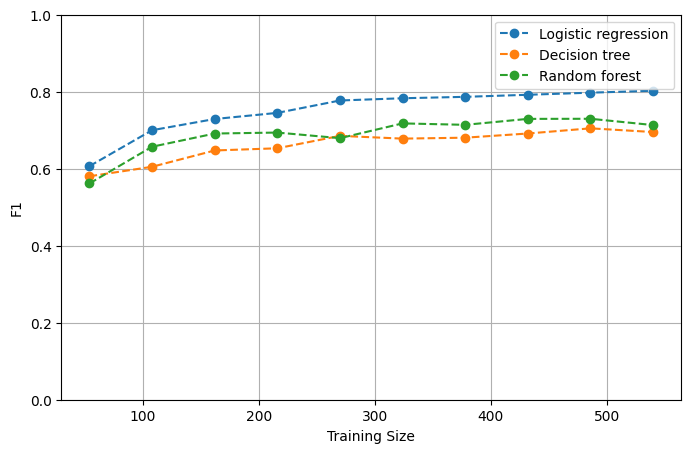

In [ ]:
plt.figure(figsize=(8,5))
for ens_name in ensembles.keys():
  plt.plot(train_sizes, accuracy_list[ens_name], 'o', linestyle='--',label=ens_name)

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for ens_name in ensembles.keys():
  plt.plot(train_sizes, f1_list[ens_name], 'o', linestyle='--',label=ens_name)

plt.xlabel('Training Size')
plt.ylabel('F1')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* number of decision trees
* learning rate

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)


param_grid = {
    'n_estimators': np.linspace(10, 100, 10).astype(int),
    'learning_rate': np.logspace(-2, -0.3, 5)
}

grid = GridSearchCV(gbc, param_grid, cv=5, scoring='f1_macro')

In [ ]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': array([0.01      , 0.02660725, 0.07079458, 0.18836491, 0.50118723]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='f1_macro')

In [ ]:
print(f"Optimal number of estimators: {grid.best_params_['n_estimators']}")
print(f"Optimal value of learning rate: {grid.best_params_['learning_rate']:.5f}")

Optimal number of estimators: 90
Optimal value of learning rate: 0.18836


In [ ]:
y_pred = grid.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f'f1 quality: {f1:.3f}')
print(f'accuracy quality: {accuracy:.3f}')

f1 quality: 0.778
accuracy quality: 0.775
